# Open Images data preparation V1

Copy of original notebook (00) (tidying up original code).

The goal of this notebook is to get the public Open Images data formatted in such a way it can be used with Detectron2.

To download the Open Images, we're using the following script:
- https://github.com/spmallick/learnopencv/blob/master/downloadOpenImages/downloadOI.py

We need to format the images downloaded using the script into Detectron2 style:
- https://detectron2.readthedocs.io/tutorials/datasets.html

Detectron2 example style:
```
{'annotations': [{'bbox': [994, 619, 1445, 1166],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0,
   'iscrowd': 0,
   'segmentation': [[1020.5,
     963.5,
     1000.5,
     841.5,
		 ... #### Truncated ####
     989.5,
     1020.5,
     963.5]]}],
 'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
 'height': 1536,
 'image_id': 0,
 'width': 2048}
```

An example notebook using Detectron2 style inputs can be found here: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5

We'll start by downloading a few sample images, then build a little script which converts the samples to Detectron2 style before ramping it up.

In [1]:
# # Install wget
# import sys
# !conda install --yes --prefix {sys.prefix} -c anaconda wget

In [2]:
# # Install OpenCV (cv2)
# import sys
# !conda install --yes --prefix {sys.prefix} -c conda-forge opencv

In [3]:
# # Download required meta-files for V5 - https://storage.googleapis.com/openimages/web/download.html

# # Training bounding boxes (1.11G)
# !wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# # Validating bounding boxes (23.94M)
# !wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
    
# # Testing bounding boxes (73.89M)
# !wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# # Class Names (11.73K)
# !wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv


In [4]:
# Classes of amenities Airbnb mostly cares about
subset = ["Toilet",
          "Swimming_pool",
          "Bed",
          "Billiard_table",
          "Sink",
          "Fountain",
          "Oven",
          "Ceiling_fan",
          "Television",
          "Microwave_oven",
          "Gas_stove",
          "Refrigerator",
          "Kitchen_&_dining_room_table",
          "Washing_machine",
          "Bathtub",
          "Stairs",
          "Fireplace",
          "Pillow",
          "Mirror",
          "Shower",
          "Couch",
          "Countertop",
          "Coffeemaker",
          "Dishwasher",
          "Sofa_bed",
          "Tree_house",
          "Towel",
          "Porch",
          "Wine_rack",
          "Jacuzzi"]

In [10]:
# Install tqdm & awscli
#!conda install --yes --prefix {sys.prefix} -c conda-forge tqdm awscli

In [11]:
# Download bathtub and toilet images
!python3 downloadOI.py --classes 'Bathtub,Toilet' --mode validation

Class 0 : Bathtub
Class 1 : Toilet
Annotation Count : 43
Number of images to be downloaded : 39
100%|███████████████████████████████████████████| 39/39 [00:50<00:00,  1.29s/it]


In [27]:
!python3 downloadOI.py --classes 'Bed' --dataset validation

Class 0 : Bed
Class annotations 1: 03646bb2f288eaae,xclick,/m/03ssj5,1,0,0.9985229,0.22295806,0.9977925,1,1,0,0,0
0a6bc386b28f2aac,xclick,/m/03ssj5,1,0.182,0.716,0.536,0.928,0,0,0,0,0
0a6bc386b28f2aac,xclick,/m/03ssj5,1,0.376,0.99,0.59466666,1,0,0,0,0,0
0fb3a760f909c8c9,xclick,/m/03ssj5,1,0.28541666,0.99791664,0.48043817,0.9984351,1,1,0,0,0
1229d5e203956ac6,xclick,/m/03ssj5,1,0,0.3609375,0.18333334,0.775,0,1,0,0,0
1229d5e203956ac6,xclick,/m/03ssj5,1,0.63125,1,0.26875,0.9791667,0,0,0,0,0
15e9f230f8f0609f,xclick,/m/03ssj5,1,0,1,0.70625,1,0,1,0,0,0
17e05469444c8e0a,xclick,/m/03ssj5,1,0,1,0.21666667,1,0,1,0,0,0
18c8303c966a5ac6,xclick,/m/03ssj5,1,0,1,0.017699115,1,0,1,0,0,0
18ced18aee04c48e,xclick,/m/03ssj5,1,0,1,0,1,0,1,0,0,0
1d5bb9d9a8a49e84,xclick,/m/03ssj5,1,0,0.8421875,0.079166666,1,0,0,0,0,0
208e95b8f33fecda,xclick,/m/03ssj5,1,0,0.6233383,0.5629139,1,0,1,0,0,0
20af1d21449acdce,xclick,/m/03ssj5,1,0,0.4640625,0,0.48958334,1,1,0,0,0
2110e5d8ca7e5a99,xclick,/m/03ssj5,1,0,0.9984375,0,0.99

Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/44e6ff6555a759f3.jpg validation/44e6ff6555a759f3.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/4775ce4f3625482e.jpg validation/4775ce4f3625482e.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/477926ac3bcfb06e.jpg validation/477926ac3bcfb06e.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/50123869e3d723f1.jpg validation/50123869e3d723f1.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/50c91362e9bc580f.jpg validation/50c91362e9bc580f.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/5991aecc161bb5c8.jpg validation/5991aecc161bb5c8.jpg
Command 2: aws s3 --no-sign-request --only-show-errors cp s3://open-images-dataset/validation/5a44d26db9ea0aa8.jpg val

100%|█████████████████████████████████████████| 103/103 [01:38<00:00,  1.05it/s]


In [18]:
# Turn subset of target classes into a long string for the command line
subset_string = str()
for i in subset:
    subset_string += str(i) + ","
subset_string

'Toilet,Swimming_pool,Bed,Billiard_table,Sink,Fountain,Oven,Ceiling_fan,Television,Microwave_oven,Gas_stove,Refrigerator,Kitchen_&_dining_room_table,Washing_machine,Bathtub,Stairs,Fireplace,Pillow,Mirror,Shower,Couch,Countertop,Coffeemaker,Dishwasher,Sofa_bed,Tree_house,Towel,Porch,Wine_rack,Jacuzzi,'

## Try download all the target images

I'm going to now try and download all the target images (subset of classes) from the Open Images validation set.

It would be good to have a function which downloaded strictly images of a certain class based on a list.

Then created the labels later... that would save me from manipulating all the images I download with `downloadOI.py`...

In [19]:
# !python3 downloadOI.py --classes 'Toilet,Swimming_pool,Bed,Billiard_table,Sink,Fountain,Oven,Ceiling_fan,Television,Microwave_oven,Gas_stove,Refrigerator,Kitchen_&_dining_room_table,Washing_machine,Bathtub,Stairs,Fireplace,Pillow,Mirror,Shower,Couch,Countertop,Coffeemaker,Dishwasher,Sofa_bed,Tree_house,Towel,Porch,Wine_rack,Jacuzzi' --mode validation

In [20]:
# !python3 downloadOI.py --classes 'Kitchen_&_dining_room_table' --dataset validation

In [10]:
target_classes = "Swimming_pool"

In [11]:
!python3 downloadOI.py --classes 'Swimming_pool' --dataset validation

Class 0 : target_classes
Traceback (most recent call last):
  File "downloadOI.py", line 56, in <module>
    command = "grep "+ dict_list[class_name.replace("_", " ")] + " ./" + dataset + "-annotations-bbox.csv"
KeyError: 'target classes'


## TODO - Function for visualizing images with their labels

## Converting images/labels to Detectron2 style
Now I've got images ready, my goal is to now convert their current style them into Detectron2 style (see below).

Current style:
- Filepath: `validation/Toilet/0d0719cfd8e417b7.jpg`
- Label filename: `0d0719cfd8e417b7.txt`
- Image filename: `0d0719cfd8e417b7.jpg`
- Contents of label file: `Toilet,0.093371,0.986232,0.189984,0.965806`

I'll need a way to:
1. Traverse different file paths
2. Gather filenames and explore their text contents
3. Seek duplicates and make sure they contain multiple labels

What I should end up with is:
- A single file of images (can convert this to train/test later)
- A dictionary of all of the different parameters for each image path
    - Perhaps I could do this with a Pandas dataframe? So it's visual? Then convert it to JSON maybe?

In [1]:
detectron2_style = {
   'annotations': [{'bbox': [994, 619, 1445, 1166],
   'bbox_mode': "BoxMode.XYXY_ABS", ## NOTE: this isn't a string in the actual label
   'category_id': 0,
   'iscrowd': 0,
   'segmentation': [[1020.5,
     963.5,
     1000.5,
     841.5,
     #### Truncated ####
     989.5,
     1020.5,
     963.5]]}],
 'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
 'height': 1536,
 'image_id': 0,
 'width': 2048
}

## Get image filenames

In [22]:
%%time
import os
img_files = []
for path, dirnames, filenames in os.walk("validation"):
    for file in filenames:
        if ".jpg" in file:
            img_files.append(os.path.join(path, file))
img_files[:3]

CPU times: user 556 µs, sys: 967 µs, total: 1.52 ms
Wall time: 2.05 ms


['validation/d0e26d6efd457fc8.jpg',
 'validation/608fda8c976e0ac5.jpg',
 'validation/898890757a38a6db.jpg']

In [23]:
# Total number of images
len(img_files)

103

# FIGURED IT OUT - Just download images and create labels as needed

Why am I doing such hard work manipulating images when I could just use their own annotation files?

Why give a sh*t about the text files for labels when I've already got validation-annotations-bbox.csv... and the same with train-annotations-bbox.csv... derp. Time to use both of these to my advantage and just manipulate the images to be in the folders I want them in.

I should write a function which:
- Gets my image IDs
- Matches them with their details in the annotations csv 
- Saves their file name

In [51]:
import pandas as pd
val_annot = pd.read_csv("validation-annotations-bbox.csv")
val_annot.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,freeform,/m/0cmf2,1,0.022464,0.964178,0.070656,0.800164,0,0,0,0,0
1,000595fe6fee6369,freeform,/m/02wbm,1,0.000000,1.000000,0.000233,1.000000,0,0,1,0,0
2,000595fe6fee6369,freeform,/m/02xwb,1,0.141030,0.180277,0.676262,0.732455,0,0,0,0,0
3,000595fe6fee6369,freeform,/m/02xwb,1,0.213781,0.253028,0.298764,0.354956,1,0,0,0,0
4,000595fe6fee6369,freeform,/m/02xwb,1,0.232926,0.288447,0.488954,0.545146,1,0,0,0,0


In [34]:
train_annot = pd.read_csv("train-annotations-bbox.csv")
train_annot.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [7]:
# Get classnames 
classes = pd.read_csv("class-descriptions-boxable.csv", names=["id", "ClassName"])
classes

,id,ClassName
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [52]:
%%time
# Create classname column on annotations which converts label codes to string labels
val_annot["ClassName"] = val_annot["LabelName"].map(classes.set_index("id")["ClassName"])
val_annot["ClassName"]

CPU times: user 30.2 ms, sys: 1.38 ms, total: 31.6 ms
Wall time: 31.6 ms


0           Airplane
1               Food
2              Fruit
3              Fruit
4              Fruit
             ...    
204616    Houseplant
204617         Plant
204618        Flower
204619        Flower
204620      Building
Name: ClassName, Length: 204621, dtype: object

# DONT NEED -- Move all images into one file (images)
Since I've already got a key (the annotations CSV), I'm going to move all the images into one file and manipulate them later.

In [24]:
# # Take these and move them into one file
# img_files[:3]

In [25]:
# # Make directory with images
# from pathlib import Path
# Path("images").mkdir(parents=True, exist_ok=True)

In [26]:
# # Copy images files to images
# import shutil
# for image in img_files:
#     shutil.copy2(image, "images")

## Get Image ID's

In [56]:
# Make list of images we have and split them off the dataframe with all the label information
my_images = [os.path.splitext(img_name)[0] for img_name in os.listdir("images")]
my_images

['5711198e8b0bad28',
 '5ba65f801a71d6b7',
 '9c9230fa76af09f7',
 'd0e26d6efd457fc8',
 'd828dedc4bb72794',
 'a8d7f65b1f6c2b76',
 'd60e1c25e87d8b45',
 'fb9a241380d2ea2a',
 'a0630cc0bccb0ff4',
 '608fda8c976e0ac5',
 '2830555fb925b7cd',
 '306663933be99f85',
 '2f2039140c8b1f2b',
 '6142a6f0fdcaf904',
 '9a78a47aa2130c4d',
 '57a195b110e42fc9',
 '2e3ff32cd2fe4db9',
 '17f698ec871569ca',
 '4d50416ae9b368c1',
 '1f8d2f13a6cd1206',
 '5eccbb09f7ae7e44',
 '898890757a38a6db',
 '8558b8939a61623a',
 'c802135341d8cca0',
 '7c2825a3d8e0ed29',
 '3120e46a6a14d2ee',
 '515486af5c27a2f0',
 'da94dcef7faefc69',
 'ab9b1e4579fd710b',
 '123933088352eb12',
 '2f3df10cd7e5ff4a',
 '8ba2a53001aeba10',
 '3fb5e100e9962553',
 '9d7cb855ed6b711d',
 '1ead457c867be1cd',
 '5e360c07411fb805',
 'f54ce42a32feccf0',
 '50c91362e9bc580f',
 'a571f1124483b074',
 '44f6da86951211ce',
 '791d14fc54af3cc3',
 '82ed3a2de7df67a8',
 '85c499f10d7a6ae3',
 '5c24a157dc99ac6b',
 '1e2c50b991a82ee8',
 '408bfc9875660552',
 '7d1dc0fae60ed7e8',
 'b10730442db

In [28]:
def get_images_ids(image_folder=None):
    """
    Explores a folder of images and gets their ID from their file name.
    Returns a list of all image ID's in image_folder.
    E.g. image_folder/608fda8c976e0ac.jpg -> ["608fda8c976e0ac"]
    
    Params
    ------
    image_folder (str): path to folder of images, e.g. "../validation/"
    """
    return [os.path.splitext(img_name)[0] for img_name in os.listdir(image_folder)]

## Get images information for only images we have
Extract image information for images in the validation metadata DataFrame but only for images we have.

In [84]:
# Make sure we only get the images we're concerned about
my_images_df = val_annot[val_annot["ImageID"].isin(my_images)]
my_images_df.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName
453,007f71665b0812a7,freeform,/m/02522,1,0.000000,0.048055,0.764146,0.976120,0,1,0,0,0,Computer monitor
454,007f71665b0812a7,freeform,/m/02522,1,0.000000,0.271434,0.099897,0.753401,0,1,0,0,0,Computer monitor
455,007f71665b0812a7,freeform,/m/02522,1,0.050252,0.168167,0.788567,1.000000,0,1,0,0,0,Computer monitor
456,007f71665b0812a7,freeform,/m/02522,1,0.322701,1.000000,0.000000,0.996634,0,1,0,0,0,Computer monitor
457,007f71665b0812a7,freeform,/m/07c52,1,0.000000,1.000000,0.000775,1.000000,0,0,0,0,0,Television


In [85]:
len(my_images_df)

4541

## Create categorical code column
Convert string based label name to category, for example:
* `Toilet` -> `1`
* `Bathtub` -> `2`

In [86]:
%%time
category_ids = pd.Categorical(my_images_df["ClassName"]).codes
my_images_df.loc[:, "ClassID"] = category_ids
my_images_df.head()

CPU times: user 5.21 ms, sys: 1.84 ms, total: 7.04 ms
Wall time: 7.3 ms


/Users/daniel/Desktop/airbnb-project/env/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/daniel/Desktop/airbnb-project/env/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
453,007f71665b0812a7,freeform,/m/02522,1,0.000000,0.048055,0.764146,0.976120,0,1,0,0,0,Computer monitor,32
454,007f71665b0812a7,freeform,/m/02522,1,0.000000,0.271434,0.099897,0.753401,0,1,0,0,0,Computer monitor,32
455,007f71665b0812a7,freeform,/m/02522,1,0.050252,0.168167,0.788567,1.000000,0,1,0,0,0,Computer monitor,32
456,007f71665b0812a7,freeform,/m/02522,1,0.322701,1.000000,0.000000,0.996634,0,1,0,0,0,Computer monitor,32
457,007f71665b0812a7,freeform,/m/07c52,1,0.000000,1.000000,0.000775,1.000000,0,0,0,0,0,Television,140


In [87]:
len(my_images_df)

4541

## Start creating dataset dictionarys (how Detectron2 takes inputs)

In [88]:
# Import CV2 for getting height & width of image
import cv2

In [89]:
my_images[:10]

['5711198e8b0bad28',
 '5ba65f801a71d6b7',
 '9c9230fa76af09f7',
 'd0e26d6efd457fc8',
 'd828dedc4bb72794',
 'a8d7f65b1f6c2b76',
 'd60e1c25e87d8b45',
 'fb9a241380d2ea2a',
 'a0630cc0bccb0ff4',
 '608fda8c976e0ac5']

In [90]:
len(my_images)

724

In [91]:
%%time
# Create images labels setup in detectron2 style
img_dicts = []
for img in my_images:
    record = {}
    # Add image metadata
    file_name = "images/" + img + ".jpg"
    height, width = cv2.imread(file_name).shape[:2]
    img_data = my_images_df[my_images_df["ImageID"] == img].reset_index()
    
    record["file_name"] = file_name
    record["image_id"] = img
    record["height"] = height
    record["width"] = width
    
    # Create annotations list (contains labels of images)
    annotations = []
    for i in range(len(img_data)):
        img_label = img_data.loc[i]["ClassName"]
        category_id = img_data.loc[i]["ClassID"]
        #print(f"label: {img_label}")
        bbox = [img_data.loc[i][["XMin", "XMax", "YMin", "YMax"]].values]
        obj = {
            "bbox": bbox,
            "bbox_mode": 0, # TODO
            #"img_label": img_label, # not needed
            "category_id": category_id, 
             #"segmentation": ["poly"], # not needed for bounding boxes
             #"iscrowd": 0 # not included as per detectron2 docs sure of this  
        }
        annotations.append(obj)
        #print(annotations)
    record["annotations"] = annotations
    img_dicts.append(record)
img_dicts

CPU times: user 15.7 s, sys: 299 ms, total: 16 s
Wall time: 16.6 s


[{'file_name': 'images/5711198e8b0bad28.jpg',
  'image_id': '5711198e8b0bad28',
  'height': 768,
  'width': 1024,
  'annotations': [{'bbox': [array([0.749518, 0.9998799999999999, 0.841033, 0.999706], dtype=object)],
    'bbox_mode': 0,
    'category_id': 125},
   {'bbox': [array([0.011687000000000001, 1.0, 0.0, 1.0], dtype=object)],
    'bbox_mode': 0,
    'category_id': 66},
   {'bbox': [array([0.090521, 0.125798, 0.0, 0.220084], dtype=object)],
    'bbox_mode': 0,
    'category_id': 159},
   {'bbox': [array([0.325925, 0.497331, 0.289529, 0.679477], dtype=object)],
    'bbox_mode': 0,
    'category_id': 159}]},
 {'file_name': 'images/5ba65f801a71d6b7.jpg',
  'image_id': '5ba65f801a71d6b7',
  'height': 768,
  'width': 1024,
  'annotations': [{'bbox': [array([0.001042, 1.0, 0.16919700000000001, 1.0], dtype=object)],
    'bbox_mode': 0,
    'category_id': 157}]},
 {'file_name': 'images/9c9230fa76af09f7.jpg',
  'image_id': '9c9230fa76af09f7',
  'height': 766,
  'width': 1024,
  'annotatio

In [92]:
len(img_dicts)

724

In [93]:
# Check my labels
import random
number = round(random.random())
print(number)
img_dicts[number]

1


{'file_name': 'images/5ba65f801a71d6b7.jpg',
 'image_id': '5ba65f801a71d6b7',
 'height': 768,
 'width': 1024,
 'annotations': [{'bbox': [array([0.001042, 1.0, 0.16919700000000001, 1.0], dtype=object)],
   'bbox_mode': 0,
   'category_id': 157}]}

In [94]:
img_dicts[1]

{'file_name': 'images/5ba65f801a71d6b7.jpg',
 'image_id': '5ba65f801a71d6b7',
 'height': 768,
 'width': 1024,
 'annotations': [{'bbox': [array([0.001042, 1.0, 0.16919700000000001, 1.0], dtype=object)],
   'bbox_mode': 0,
   'category_id': 157}]}

In [95]:
img_dicts[2]

{'file_name': 'images/9c9230fa76af09f7.jpg',
 'image_id': '9c9230fa76af09f7',
 'height': 766,
 'width': 1024,
 'annotations': [{'bbox': [array([0.0, 0.999704, 0.0, 0.49466000000000004], dtype=object)],
   'bbox_mode': 0,
   'category_id': 148},
  {'bbox': [array([1.3000000000000001e-05, 1.0, 0.5221359999999999,
           0.9996780000000001], dtype=object)],
   'bbox_mode': 0,
   'category_id': 133}]}

In [96]:
img_dicts[3]

{'file_name': 'images/d0e26d6efd457fc8.jpg',
 'image_id': 'd0e26d6efd457fc8',
 'height': 742,
 'width': 1024,
 'annotations': [{'bbox': [array([0.457844, 0.9990180000000001, 0.335891, 0.9981059999999999],
          dtype=object)],
   'bbox_mode': 0,
   'category_id': 7},
  {'bbox': [array([0.00020899999999999998, 0.165664, 0.552216, 0.8142550000000001],
          dtype=object)],
   'bbox_mode': 0,
   'category_id': 135},
  {'bbox': [array([0.27716, 0.560285, 0.464685, 0.803928], dtype=object)],
   'bbox_mode': 0,
   'category_id': 58},
  {'bbox': [array([0.610495, 0.770189, 0.510946, 0.6082850000000001], dtype=object)],
   'bbox_mode': 0,
   'category_id': 58},
  {'bbox': [array([0.00025, 0.998901, 0.0, 0.9992489999999999], dtype=object)],
   'bbox_mode': 0,
   'category_id': 18},
  {'bbox': [array([0.00036, 0.370289, 0.134139, 0.68577], dtype=object)],
   'bbox_mode': 0,
   'category_id': 159}]}

In [97]:
my_images_df[my_images_df["ImageID"] == "5ba65f801a71d6b7"]

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
75511,5ba65f801a71d6b7,freeform,/m/0174k2,1,0.001042,1.0,0.169197,1.0,0,0,1,0,0,Washing machine,157


## View an image

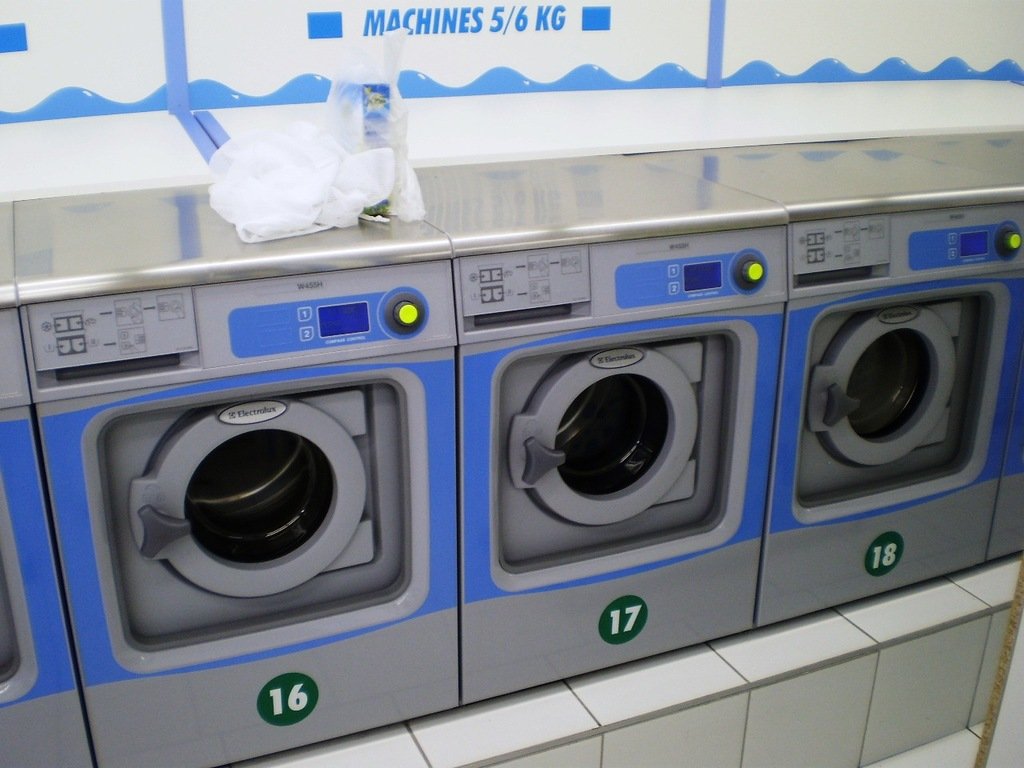

In [80]:
from IPython.display import Image
Image("images/5ba65f801a71d6b7.jpg")

# TK: Could I turn this into a script? Instead of it being in a notebook?

In [60]:
import csv
with open("validation-annotations-bbox.csv") as file:
    reader = csv.reader(file)   
reader

TypeError: '_csv.reader' object is not subscriptable

In [64]:
import csv
with open("class-descriptions-boxable.csv") as file:
    reader = csv.reader(file)
    dict_list = {row[1]:row[0] for row in reader}
dict_list

{'Tortoise': '/m/011k07',
 'Container': '/m/011q46kg',
 'Magpie': '/m/012074',
 'Sea turtle': '/m/0120dh',
 'Football': '/m/01226z',
 'Ambulance': '/m/012n7d',
 'Ladder': '/m/012w5l',
 'Toothbrush': '/m/012xff',
 'Syringe': '/m/012ysf',
 'Sink': '/m/0130jx',
 'Toy': '/m/0138tl',
 'Organ': '/m/013y1f',
 'Cassette deck': '/m/01432t',
 'Apple': '/m/014j1m',
 'Human eye': '/m/014sv8',
 'Cosmetics': '/m/014trl',
 'Paddle': '/m/014y4n',
 'Snowman': '/m/0152hh',
 'Beer': '/m/01599',
 'Chopsticks': '/m/01_5g',
 'Human beard': '/m/015h_t',
 'Bird': '/m/015p6',
 'Parking meter': '/m/015qbp',
 'Traffic light': '/m/015qff',
 'Croissant': '/m/015wgc',
 'Cucumber': '/m/015x4r',
 'Radish': '/m/015x5n',
 'Towel': '/m/0162_1',
 'Doll': '/m/0167gd',
 'Skull': '/m/016m2d',
 'Washing machine': '/m/0174k2',
 'Glove': '/m/0174n1',
 'Tick': '/m/0175cv',
 'Belt': '/m/0176mf',
 'Sunglasses': '/m/017ftj',
 'Banjo': '/m/018j2',
 'Cart': '/m/018p4k',
 'Ball': '/m/018xm',
 'Backpack': '/m/01940j',
 'Bicycle': '/m/